<a href="https://colab.research.google.com/github/Ethan-Jeong/test_deeplearning/blob/master/boston_housingwithregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets.boston_housing import load_data

# Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data(path='boston_hosing.npz',test_split=0.2,seed=113)
x_train.shape , y_train.shape , x_test.shape , y_train.shape

57344/57026 [==============================] - 0s 0us/step


((404, 13), (404,), (102, 13), (404,))

In [ ]:
type(x_train)

numpy.ndarray

In [28]:
import pandas as pd

In [56]:
dfr = pd.DataFrame(x_train)
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


# DB 저장

In [53]:
import sqlite3

In [54]:
connect = sqlite3.connect('./db.sqlite3')

In [57]:
dfr.to_sql('boston_housing_resource',connect, if_exists='append',index=False)

In [58]:
df = pd.read_sql_query('select * from boston_housing_resource',connect)

In [60]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000
mean,1.669663,5.498291,4.736058,-0.097476,-2.100179,-1.286692,33.268841,0.947842,4.176959,201.727911,5.034429,175.504331,5.491193
std,6.852837,17.830605,7.986580,2.945869,6.599758,7.640546,40.852378,3.160287,8.095102,235.712504,13.543299,191.320923,8.883316
min,-0.449678,-0.503988,-1.862320,-1.322796,-17.316788,-14.225151,-2.557856,-2.479545,-1.198510,-2.450584,-9.623769,-3.814626,-1.968168
25%,-0.446593,-0.503988,-1.662878,-1.322796,-6.168125,-8.973449,-2.460649,-1.988807,-1.145512,-2.445441,-8.277929,-3.770377,-1.783542
50%,0.014065,-0.163264,-0.406426,0.000000,0.458000,-0.194293,0.233416,0.490118,0.053115,92.784179,2.461262,-1.724869,0.226071
75%,0.289563,0.000000,9.690000,0.000000,0.631000,6.196750,78.400000,3.137300,5.000000,330.000000,19.100000,391.240000,11.367500
max,88.976200,100.000000,27.740000,15.903167,18.096614,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [62]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape , x_test.shape

((404, 13), (102, 13))

In [ ]:
df = pd.DataFrame(x_train)
df.describe()

In [64]:
df.to_sql('boston_housing_scale_xtrain',connect,if_exists='append',index=False)

In [65]:
dfr = pd.read_sql_query('select * from boston_housing_scale_xtrain',connect)

In [66]:
dfr.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,1.140727e-15,-4.542131e-14,2.816614e-14,3.542271e-16,-1.538923e-17,-2.078645e-15,-3.225693e-14,-3.852804e-16,5.811083e-15,-1.748079e-13,-7.115320e-15,5.632026e-13,-1.022999e-14
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.051005e-01,-4.836155e-01,-1.564696e+00,-2.568327e-01,-1.471269e+00,-3.817250e+00,-2.369042e+00,-1.287503e+00,-9.715693e-01,-1.311311e+00,-2.673752e+00,-3.771101e+00,-1.519664e+00
25%,-3.969615e-01,-4.836155e-01,-8.782218e-01,-2.568327e-01,-8.908055e-01,-5.534305e-01,-8.433882e-01,-8.202251e-01,-6.262491e-01,-7.636737e-01,-5.692381e-01,2.116008e-01,-8.075036e-01
50%,-3.766520e-01,-4.836155e-01,-2.079167e-01,-2.568327e-01,-1.652266e-01,-9.674263e-02,3.400464e-01,-2.949009e-01,-5.111423e-01,-4.567563e-01,2.839433e-01,3.879673e-01,-1.857436e-01
75%,-7.617386e-03,4.296024e-02,1.028326e+00,-2.568327e-01,6.286420e-01,4.823165e-01,8.990647e-01,6.794540e-01,1.675886e+00,1.565287e+00,7.844764e-01,4.401777e-01,6.005999e-01
max,9.234847e+00,3.728990e+00,2.445374e+00,3.893584e+00,2.677335e+00,3.467186e+00,1.110488e+00,3.437406e+00,1.675886e+00,1.836097e+00,1.603531e+00,4.480771e-01,3.482019e+00


# Model and fit

In [68]:
model = tf.keras.models.Sequential()

In [71]:
model.add(tf.keras.Input(shape=(13))) # input layer

model.add(tf.keras.layers.Dense(64,activation='relu')) # hidden layer = 기능 layer
model.add(tf.keras.layers.Dense(64,activation='relu')) # hidden layer = 기능 layer
model.add(tf.keras.layers.Dense(64,activation='relu')) # hidden layer = 기능 layer

model.add(tf.keras.layers.Dense(1,)) # output layer

# sgd = tf.keras.optimizers.SGD(
#     learning_rate=0.001,
#     momontum=0.004,
# )

model.compile(optimizer='adam',loss='mse',metrics=['mae'])
# MAE - mean absolute error -   평균절대오차 

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [73]:
model.summary() # 결과 요약 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 65        
_________________________________________________________________
input_7 (InputLayer)         multiple                  0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_23 (Dense)             (None, 64)               

In [75]:
hist = model.fit(x_train,y_train,epochs=500, validation_split=0.3)

Epoch 1/500
9/9 [==============================] - 0s 22ms/step - loss: 2.0077 - mae: 1.0696 - val_loss: 2.3508 - val_mae: 1.1333
Epoch 2/500
9/9 [==============================] - 0s 7ms/step - loss: 1.8819 - mae: 1.0223 - val_loss: 2.5426 - val_mae: 1.1704
Epoch 3/500
9/9 [==============================] - 0s 5ms/step - loss: 1.7876 - mae: 0.9742 - val_loss: 2.4592 - val_mae: 1.1566
Epoch 4/500
9/9 [==============================] - 0s 7ms/step - loss: 1.8860 - mae: 0.9802 - val_loss: 2.4488 - val_mae: 1.1767
Epoch 5/500
9/9 [==============================] - 0s 7ms/step - loss: 1.6713 - mae: 0.9258 - val_loss: 2.6386 - val_mae: 1.1967
Epoch 6/500
9/9 [==============================] - 0s 7ms/step - loss: 1.5481 - mae: 0.9004 - val_loss: 2.4301 - val_mae: 1.1611
Epoch 7/500
9/9 [==============================] - 0s 7ms/step - loss: 1.4818 - mae: 0.8627 - val_loss: 2.6664 - val_mae: 1.2406
Epoch 8/500
9/9 [==============================] - 0s 7ms/step - loss: 1.6164 - mae: 0.9260 - va

# Evaluation

In [77]:
hist.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

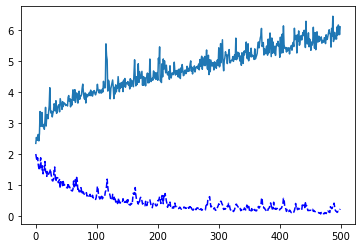

In [80]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],'b--')
plt.plot(hist.history['val_loss'])
plt.show()

In [44]:
# model.evaluate(x_train,y_train) # loss: 15.5009 - mae: 2.6761

13/13 [==============================] - 0s 1ms/step - loss: 15.5009 - mae: 2.6761


[15.500893592834473, 2.6761088371276855]

In [70]:
model.evaluate(x_train,y_train)

13/13 [==============================] - 0s 2ms/step - loss: 588.4859 - mae: 22.4405


[588.4859008789062, 22.440532684326172]

# Service

In [49]:
x_train[10] , x_test.shape

(array([-0.33710002, -0.50398828, -1.48115445, -1.32279581,  5.1262729 ,
        -8.56801832, -2.43316853, -2.35565036, -0.89377027, -2.43327233,
        -8.05017099, -3.77209189, -1.61425073]), (102, 13))

In [50]:
model.predict([[-0.33710002, -0.50398828, -1.48115445, -1.32279581,  5.1262729 ,
        -8.56801832, -2.43316853, -2.35565036, -0.89377027, -2.43327233,
        -8.05017099, -3.77209189, -1.61425073]])

array([[12.392696]], dtype=float32)

In [51]:
y_train[10]

12.1